In [35]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [10]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
data = requests.get(url).content
df = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [11]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323843,ZWE,Africa,Zimbabwe,2023-07-01,265524.0,0.0,15.857,5707.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323844,ZWE,Africa,Zimbabwe,2023-07-02,265524.0,0.0,15.857,5707.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323845,ZWE,Africa,Zimbabwe,2023-07-03,265604.0,80.0,11.429,5709.0,2.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323846,ZWE,Africa,Zimbabwe,2023-07-04,265604.0,0.0,11.429,5709.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [93]:
## hospital_beds_per_thousand
# handwashing_facilities
datos_observacion = df['population']
datos_observacion

0         41128772.0
1         41128772.0
2         41128772.0
3         41128772.0
4         41128772.0
             ...    
323843    16320539.0
323844    16320539.0
323845    16320539.0
323846    16320539.0
323847    16320539.0
Name: population, Length: 323848, dtype: float64

In [94]:
repeticiones = [0,0,0,0,0,0,0,0,0,0]
porcentajes = [0,0,0,0,0,0,0,0,0,0]
total = 0
for i in datos_observacion:
    try:
        primer_digito = str(i)[0]
        valor = int(primer_digito)
        repeticiones[valor] = repeticiones[valor] + 1
        total += 1
    except:
        print('no es numero')

for i in range (0,len(repeticiones)):
    porcentajes[i] = (repeticiones[i] * 100) / total
    

repticiones = ({
    'numeros':[0,1,2,3,4,5,6,7,8,9],
    'repticiones': repeticiones,
    'porcentajes': porcentajes,
    'benford': [0,30,18,12,10,8,7,6,5,5]
})

df_benford = pd.DataFrame(repticiones)
df_benford = df_benford.tail(-1) 
print(df_benford)


   numeros  repticiones  porcentajes  benford
1        1        92149    28.454398       30
2        2        47364    14.625380       18
3        3        47988    14.818063       12
4        4        34589    10.680628       10
5        5        35694    11.021837        8
6        6        23853     7.365492        7
7        7        12771     3.943517        6
8        8        15360     4.742966        5
9        9        14080     4.347719        5


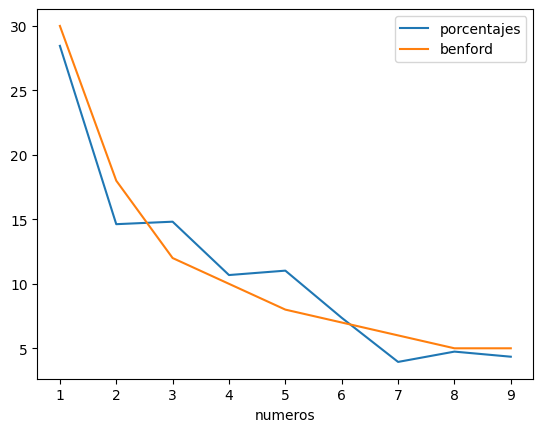

In [95]:
df_benford.plot(x="numeros", y=["porcentajes", "benford"])
plt.show()